# 03 - Gradient Decent
---

### **Introduction**
When fitting a model to training data we are attempting to find the parameters of the model that minimise the loss function. In some simple models (e.g. 2-dimensional linear regression) this can be done analytically by differentiating the loss function and solving for when this derivative is 0. However, for many models there is no analytical solution (usually because the loss function is not continuously differentiable) so the parameters must be estimated. Gradient decent is an algorithm which allows us to estimate the parameters which minimise the loss function.

### **Algorithm & Considerations**
The steps to using gradient decent to estimate the parameters $p_1,\cdots,p_k$ in a model are as follows:

1. Initialise the parameters $p_1,\cdots,p_k$ with random values $p_1^{(0)}, \ldots, p_k^{(0)}$
2. For each parameter $p_i$  
    - Differentiate the loss function with respect to $p_i$  
    - Compute this derivative at $\hat{p}_1, \ldots, \hat{p}_k$  
    - Multiply this derivative at $\hat{p}_1, \ldots, \hat{p}_k$ by the learning rate to get the step size  
    - Update the estimate of $p_i$ as $p_i^{(t+1)} = p_i^{(t)} - step size$  
4. If the step size is below a set threshold or the number of iterations is over a set threshold stop, otherwise repeat step 2

After $t$ iterations, the values $p_1^{(t)}, \ldots, p_k^{(t)}$ are the estimates of the parameters $p_1,\cdots,p_k$. 

Notice how, for a given parameter $p_i$, when we are far away from the value which minimises the loss function, the derivate will be have high magnitude (i.e. far from 0). Thus the step size will also be large. However, as we get closer the optimal value, the derivate of the loss function will tend to 0 and hence the step size will be small. This means that when we are far from the optimal value we take large jumps towards it but as we get closes we take smaller and smaller jumps. 

When the parameter estimate is too small, the derivative will be negative so subtracting it from the previous estimate will make the new estimate larger, getting us closer to the optimal value as desired. Analogously, when the estimate is too large, the derivative will be positive so subtracting it from the previous estimate make the new estimate smaller; again getting us closer to the optimal value as desired.

The learning rate is highly important to the effectiveness of gradient decent. If the learning rate is too small, the algorithm will not take large enough jumps and it may be too slow to converge. Conversely, if the learning rate is too large, the algorithm will jump past the optimal value and may diverge rather than converge. Consequenelty, dfferent values for the learning rate are often tested with hyperparameter tuning.

Furthermore, it is possible during gradient decent that we converge on local minima rather than global minima. To counteract this, it is common to run gradient decent multiple times, each with different initial values. 


### **Visualisation**
The graph below depicts how gradient decent optimises the parameter estimates. We have the parameter estimate on the x-axis against the residual sum of squares which in this example is acting as the loss function. In this example the optimal value we seek is 0. 

Note how for point 1, $x=-0.9$ so we are far from the optimatal value of $x=0$. As such, the derivative is very negative and so the step size will be large. For point 2 $x=-0.1$ so we are much closer to the optimal value and hence the derivative is close to 0 so the step size will be very small.  

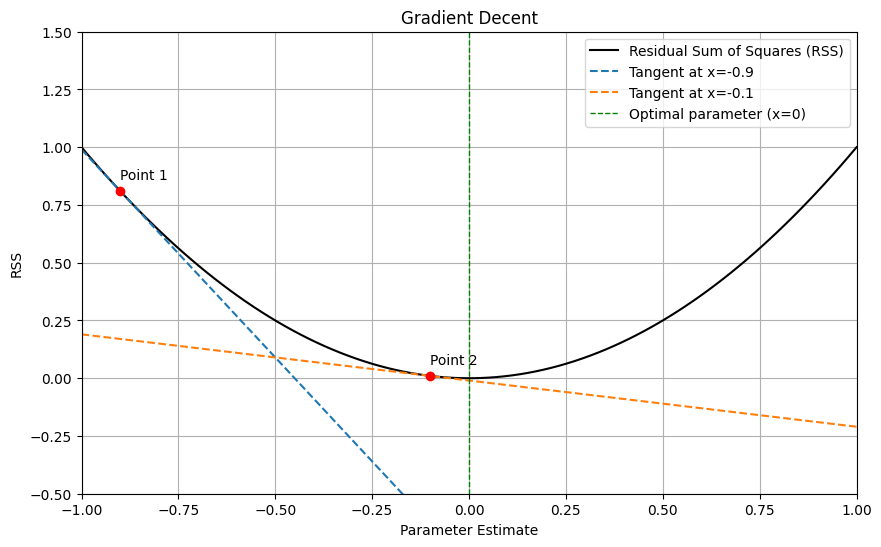

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some quadratic data to model the RSS
x = np.linspace(-1, 1, 100)
y = x**2

# Compute the derivate at a point far from the minimum and a point close to the minimum
points = [-0.9, -0.1]
derivative_at_points = 2 * np.array(points)

# Plot the quadratic function and the tangent lines at the specified points
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Residual Sum of Squares (RSS)', color='black')
for i, (point, derivative) in enumerate(zip(points, derivative_at_points), 1):
    tangent_line = derivative * (x - point) + point**2
    plt.plot(x, tangent_line, label=f'Tangent at x={point}', linestyle='--')
    plt.scatter(point, point**2, color='red', zorder=5)
    plt.annotate(f'Point {i}', xy=(point, point**2), xytext=(point, point**2+0.05),
                fontsize=10, ha='left')
plt.xlim(-1, 1)
plt.ylim(-0.5, 1.5)
plt.axvline(x=0, color='green', linestyle='--', linewidth=1, label='Optimal parameter (x=0)')
plt.title('Gradient Decent')
plt.xlabel('Parameter Estimate')
plt.ylabel('RSS')
plt.legend()
plt.grid()
plt.show()